### Importación de datos



In [160]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


In [161]:
print(tienda.info())
print(tienda2.info())
print(tienda3.info())
print(tienda4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data col

In [162]:
print(tienda.shape)
print(tienda2.shape)
print(tienda3.shape)
print(tienda4.shape)

(2359, 12)
(2359, 12)
(2359, 12)
(2358, 12)


# 1. Análisis de facturación



In [163]:
# Se procede a realizar la suma de la columna "Precios" en cada tabla para calcular el ingreso total

ingreso_total_t1 = tienda['Precio'].sum()
ingreso_total_t2 = tienda2['Precio'].sum()
ingreso_total_t3 = tienda3['Precio'].sum()
ingreso_total_t4 = tienda4['Precio'].sum()

print(ingreso_total_t1)
print(tienda['Precio'].sum())

1150880400.0
1150880400.0


In [164]:
# podemos concatenar los resultados y mostrarlos en un gráfico para poder tener una mejor visibilidad

ingreso_total = pd.DataFrame({
    'Tienda' : ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4'],
    'Ingresos_Totales' : [ingreso_total_t1, ingreso_total_t2, ingreso_total_t3, ingreso_total_t4]
})

# investigando, encontré que es necesario formatear los resultados de pandas ya que puede devolver en formato científico los valores númericos extensos
# por lo que es necesario aplicar el siguiente código para poder mostrarlos como float:

pd.set_option('display.float_format', '{:,.2f}'.format)

print(ingreso_total)

     Tienda  Ingresos_Totales
0  Tienda_1  1,150,880,400.00
1  Tienda_2  1,116,343,500.00
2  Tienda_3  1,098,019,600.00
3  Tienda_4  1,038,375,700.00


Text(0, 0.5, 'Ingresos Totales')

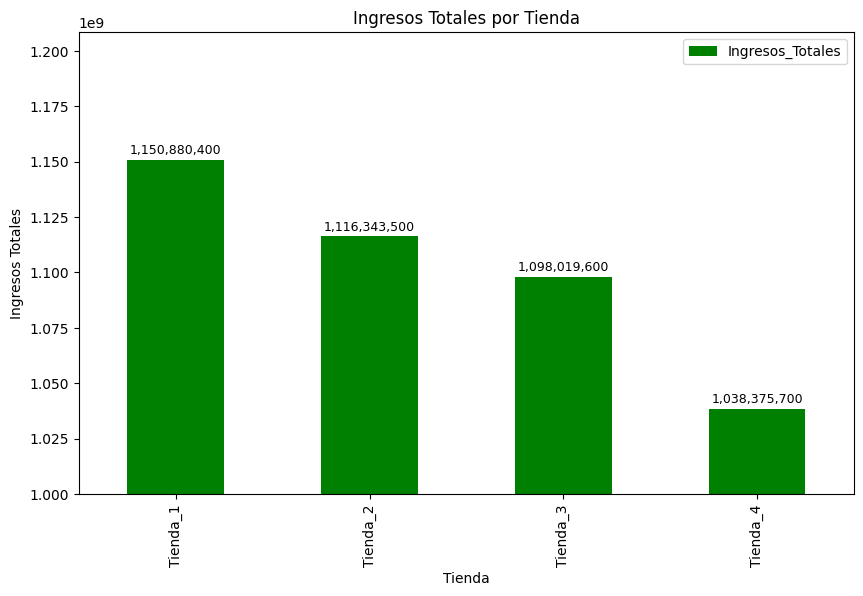

In [165]:
gr_ingresos_t = ingreso_total.plot(x= 'Tienda', y= 'Ingresos_Totales', kind='bar', color='green', figsize=(10, 6))

# al tratarse de miles de millones, podemos empezar el gráfico desde el 1B para hacerlo mas visible
gr_ingresos_t.set_ylim(1000000000, None)

# Podemos agregarle etiquetas al gráfico
gr_ingresos_t.bar_label(
    gr_ingresos_t.containers[0],
    labels=[f"{x:,.0f}" for x in ingreso_total['Ingresos_Totales']], #esto para evitar el formato cientifico
    label_type='edge',
    padding=2,
    fontsize=9,
    color='black'
)

gr_ingresos_t.set_title('Ingresos Totales por Tienda')
gr_ingresos_t.set_xlabel('Tienda')
gr_ingresos_t.set_ylabel('Ingresos Totales')


# Podemos ver que la tienda 1 es la que tiene mayores ingresos, mientras que la tienda 4 es la que tiene menor cantidad de ingresos

# 2. Ventas por categoría

In [166]:
# Nos están pidiendo calcular la cantidad de productos vendidos por categoría en cada tienda, agrupando los datos por 
# categoría y contando el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

# Vemos qué categoría genera mayores ingresos:
catxprec_t1 = tienda.groupby('Categoría del Producto')[['Precio']].mean().sort_values('Precio', ascending=False)
catxprec_t2 = tienda2.groupby('Categoría del Producto')[['Precio']].mean().sort_values('Precio', ascending=False)
catxprec_t3 = tienda3.groupby('Categoría del Producto')[['Precio']].mean().sort_values('Precio', ascending=False)
catxprec_t4 = tienda4.groupby('Categoría del Producto')[['Precio']].mean().sort_values('Precio', ascending=False)

print(catxprec_t1)
print(catxprec_t2)
print(catxprec_t3)
print(catxprec_t4)

# Contamos qué categoria tiene mayor cantidad de ventas
q_prodxcat1 = tienda['Categoría del Producto'].value_counts(ascending = False)
q_prodxcat2 = tienda2['Categoría del Producto'].value_counts(ascending = False)
q_prodxcat3 = tienda3['Categoría del Producto'].value_counts(ascending = False)
q_prodxcat4 = tienda4['Categoría del Producto'].value_counts(ascending = False)

print(q_prodxcat1)
print(q_prodxcat2)
print(q_prodxcat3)
print(q_prodxcat4)


                              Precio
Categoría del Producto              
Electrodomésticos       1,165,657.69
Electrónicos              958,690.85
Instrumentos musicales    501,642.86
Muebles                   403,513.33
Deportes y diversión      138,345.07
Artículos para el hogar    74,259.65
Juguetes                   55,542.28
Libros                     50,779.77
                              Precio
Categoría del Producto              
Electrodomésticos       1,142,845.25
Electrónicos              973,533.41
Instrumentos musicales    468,706.70
Muebles                   399,154.52
Deportes y diversión      126,343.64
Artículos para el hogar    81,474.59
Libros                     51,224.37
Juguetes                   50,943.77
                              Precio
Categoría del Producto              
Electrodomésticos       1,184,308.99
Electrónicos              910,811.09
Instrumentos musicales    437,180.23
Muebles                   402,950.10
Deportes y diversión      128,494.95
A

Text(0, 0.5, 'Categoria del Producto')

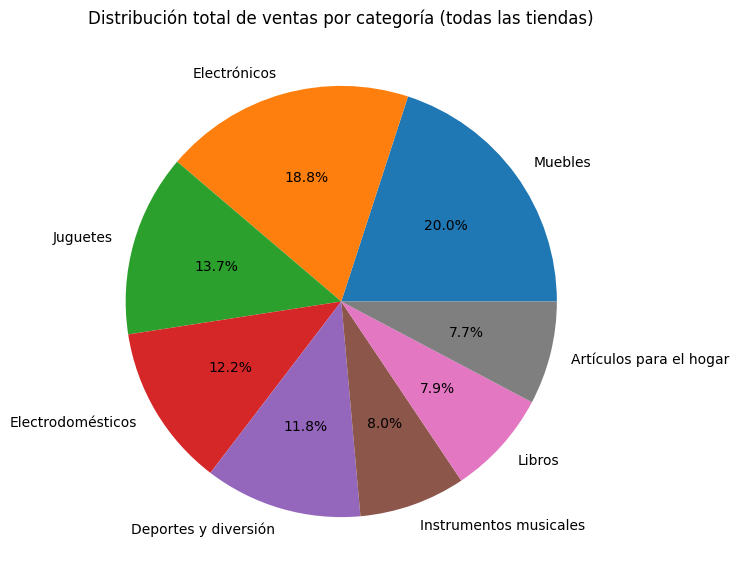

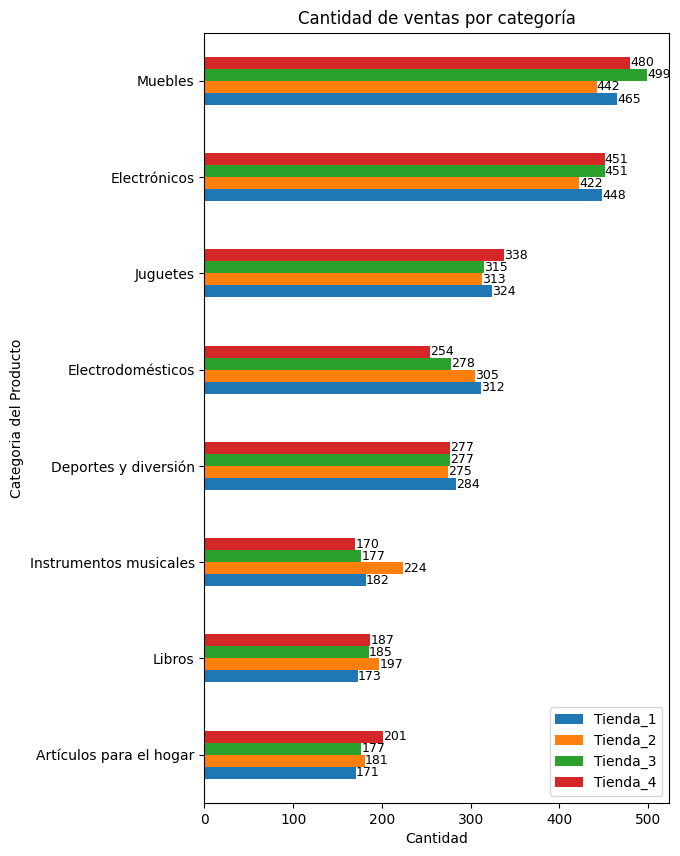

In [167]:
# SI queremos mostrar el resultado en un gráfico combinado, podemos hacer lo siguiente:

q_prodxcat_t = pd.DataFrame({
    'Tienda_1': q_prodxcat1,
    'Tienda_2': q_prodxcat2,
    'Tienda_3': q_prodxcat3,
    'Tienda_4': q_prodxcat4,
})

# Podemos tambien mostrar la proporcionalidad TOTAL de las categorias con un gráfico circular

gr_prodxcat_t_c = q_prodxcat_t.sum(axis=1)
gr_prodxcat_t_c = gr_prodxcat_t_c.sort_values(ascending=False)
gr_prodxcat_t_c.plot(kind='pie', 
                    autopct='%1.1f%%', 
                    figsize=(7,7),
                    title='Distribución total de ventas por categoría (todas las tiendas)',
                    ylabel='')

#ordenamos para que se muestre de forma descendente de acuerdo a la cantidad de ventas por categoria
q_prodxcat_t = q_prodxcat_t.loc[q_prodxcat_t.sum(axis=1).sort_values(ascending=True).index]

#se crea el gráfico de barras para mostrar las categorias por cada tienda
gr_prodxcat_t_b = q_prodxcat_t.plot(kind='barh', figsize=(6,10))

#agregamos etiquetas a través de un for
for container in gr_prodxcat_t_b.containers:
    gr_prodxcat_t_b.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

gr_prodxcat_t_b.set_title('Cantidad de ventas por categoría')
gr_prodxcat_t_b.set_xlabel('Cantidad')
gr_prodxcat_t_b.set_ylabel('Categoria del Producto')

#Podemos observar que en las 4 tiendas, las 3 categorias mas vendidas son Muebles, Electrónicos y Juguetes.


# 3. Calificación promedio de la tienda


In [168]:
#En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. 
# El objetivo es conocer la satisfacción del cliente con los productos vendidos.

calif_prom_t1 = round((tienda['Calificación'].mean()),2)
calif_prom_t2 = round((tienda2['Calificación'].mean()),2)
calif_prom_t3 = round((tienda3['Calificación'].mean()),2)
calif_prom_t4 = round((tienda4['Calificación'].mean()),2)

print(calif_prom_t1)
print(calif_prom_t2)
print(calif_prom_t3)
print(calif_prom_t4)


3.98
4.04
4.05
4.0


Text(0.5, 0, 'Tiendas')

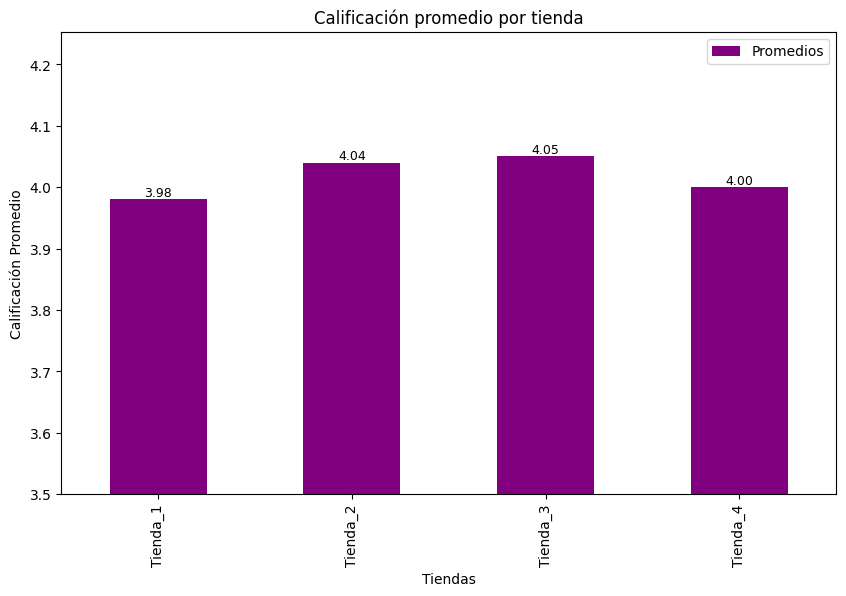

In [169]:
# volcamos la información en un grafico para poder tener mayor visibilidad

tiendas = ['Tienda_1','Tienda_2','Tienda_3','Tienda_4']
promedios = [calif_prom_t1,calif_prom_t2,calif_prom_t3,calif_prom_t4]

calif_prom_t = pd.DataFrame({
    'Tiendas' : tiendas,
    'Promedios' : promedios
})

gr_calif_prom_t = calif_prom_t.plot(x='Tiendas', y='Promedios', kind='bar', color='purple', figsize=(10,6), title='Calificación promedio por tienda')

gr_calif_prom_t.set_ylim(3.5, None)
gr_calif_prom_t.bar_label(
    gr_calif_prom_t.containers[0],
    labels=[f"{x:,.2f}" for x in calif_prom_t['Promedios']],
    fmt='%.0f', 
    label_type='edge', 
    fontsize=9, 
    color= 'black'
    )
gr_calif_prom_t.set_ylabel('Calificación Promedio')
gr_calif_prom_t.set_xlabel('Tiendas')

#Con esto podemos determinar que la tienda 3 es la que tiene mejor calificación por parte de los clientes, sin embargo no hay una diferencia considerable entre las 4.

# 4. Productos más y menos vendidos

In [170]:
# En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. 
# Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.


# Vemos qué productos genera mayores ingresos:
prodxprec_t1 = tienda.groupby('Producto')[['Precio']].mean().sort_values('Precio', ascending=False)
prodxprec_t2 = tienda2.groupby('Producto')[['Precio']].mean().sort_values('Precio', ascending=False)
prodxprec_t3 = tienda3.groupby('Producto')[['Precio']].mean().sort_values('Precio', ascending=False)
prodxprec_t4 = tienda4.groupby('Producto')[['Precio']].mean().sort_values('Precio', ascending=False)

print(prodxprec_t1.head(10))
print(prodxprec_t2.head(10))
print(prodxprec_t3.head(10))
print(prodxprec_t4.head(10))

# Generamos el conteo de la cantidad de productos vendidos
q_prod_t1 = tienda['Producto'].value_counts().rename('Tienda_1').sort_values(ascending=False).to_frame()
q_prod_t2 = tienda2['Producto'].value_counts().rename('Tienda_2').sort_values(ascending=False).to_frame()
q_prod_t3 = tienda3['Producto'].value_counts().rename('Tienda_3').sort_values(ascending=False).to_frame()
q_prod_t4 = tienda4['Producto'].value_counts().rename('Tienda_4').sort_values(ascending=False).to_frame()


                         Precio
Producto                       
TV LED UHD 4K      2,369,170.00
Refrigerador       2,076,727.78
Iphone 15          1,998,004.08
Smart TV           1,533,002.27
Lavadora de ropa   1,399,651.06
Lavavajillas       1,292,810.42
Tablet ABXY        1,134,280.95
Secadora de ropa   1,018,317.24
Celular ABXY         989,424.24
Guitarra eléctrica   793,451.06
                         Precio
Producto                       
TV LED UHD 4K      2,297,222.22
Iphone 15          2,058,650.91
Refrigerador       1,992,500.00
Smart TV           1,528,550.00
Lavadora de ropa   1,362,495.92
Lavavajillas       1,277,554.35
Tablet ABXY        1,277,495.45
Secadora de ropa   1,037,107.02
Celular ABXY       1,016,314.63
Guitarra eléctrica   775,351.06
                         Precio
Producto                       
TV LED UHD 4K      2,301,645.24
Iphone 15          2,026,645.65
Refrigerador       1,997,794.00
Smart TV           1,459,950.00
Lavadora de ropa   1,368,073.81
Lavavaji

In [171]:
# Mostremos el resultado como texto para que pueda entenderse mejor. Al tener mucha información sobre los productos, puede no ser legible en un grafico

q_prod_dict = {
    'Tienda_1': q_prod_t1,
    'Tienda_2': q_prod_t2,
    'Tienda_3': q_prod_t3,
    'Tienda_4': q_prod_t4,
}

# Iteramos el diccionario para poder mostrar los mensajes:

for tiendas, q in q_prod_dict.items():
    top = q.head(5)
    bottom = q.tail(5)

    print(f"\n{'='*80}")
    print(f"Para la {tiendas}, los 5 productos MÁS vendidos fueron:\n")
    for producto, fila in top.iterrows():
        print(f"  - {producto}: {fila[tiendas]}")
    
    print(f"\nMientras que los 5 productos MENOS vendidos fueron:\n")
    for producto, fila in bottom.iterrows():
        print(f"  - {producto}: {fila[tiendas]}")




Para la Tienda_1, los 5 productos MÁS vendidos fueron:

  - Microondas: 60
  - TV LED UHD 4K: 60
  - Armario: 60
  - Secadora de ropa: 58
  - Mesa de noche: 56

Mientras que los 5 productos MENOS vendidos fueron:

  - Ciencia de datos con Python: 39
  - Pandereta: 36
  - Olla de presión: 35
  - Auriculares con micrófono: 33
  - Celular ABXY: 33

Para la Tienda_2, los 5 productos MÁS vendidos fueron:

  - Iniciando en programación: 65
  - Microondas: 62
  - Batería: 61
  - Guitarra acústica: 58
  - Pandereta: 58

Mientras que los 5 productos MENOS vendidos fueron:

  - Auriculares: 37
  - Sillón: 35
  - Mesa de comedor: 34
  - Impresora: 34
  - Juego de mesa: 32

Para la Tienda_3, los 5 productos MÁS vendidos fueron:

  - Kit de bancas: 57
  - Mesa de comedor: 56
  - Cama king: 56
  - Set de ollas: 55
  - Mesa de noche: 55

Mientras que los 5 productos MENOS vendidos fueron:

  - Guitarra eléctrica: 38
  - Set de vasos: 36
  - Mochila: 36
  - Microondas: 36
  - Bloques de construcción:

# 5. Envío promedio por tienda

In [172]:
# En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, 
# en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

tienda.head()

envio_prom_t1 = tienda['Costo de envío'].mean()
envio_prom_t2 = tienda2['Costo de envío'].mean()
envio_prom_t3 = tienda3['Costo de envío'].mean()
envio_prom_t4 = tienda4['Costo de envío'].mean()

tiendas = ['Tienda_1','Tienda_2','Tienda_3','Tienda_4']
envio_prom = [envio_prom_t1,envio_prom_t2,envio_prom_t3,envio_prom_t4]

envio_prom_t = pd.DataFrame({
    'Tiendas' : tiendas,
    'Prom_envíos' : envio_prom
})

print(envio_prom_t.sort_values('Prom_envíos', ascending=False))



    Tiendas  Prom_envíos
0  Tienda_1    26,018.61
1  Tienda_2    25,216.24
2  Tienda_3    24,805.68
3  Tienda_4    23,459.46


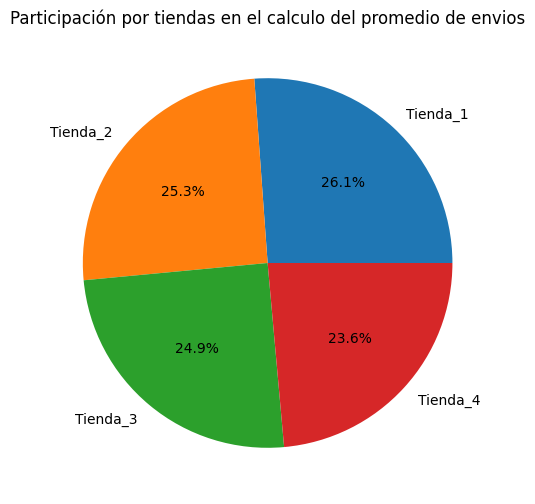

In [173]:
#Podemos representar la proporcionalidad de de los promedios a través de un grafico circular

gr_envio_prom_t = envio_prom_t.set_index('Tiendas')['Prom_envíos'].plot(
    kind='pie', 
    autopct='%1.1f%%', 
    title='Participación por tiendas en el calculo del promedio de envios', 
    figsize = (6,6), 
    ylabel=''
    )


# **Informe final sobre el análisis de las tiendas y recomendaciones a partir de los resultados**

## **1. Propósito del informe**

El objetivo del presente informe es mostrar el resultado del análisis basado en los datos otrogados por el Sr. Juan para poder ayudarle a tomar una decisión de venta sobre una de sus 4 tiendas, considerando diferentes variables y escenarios y aplicando técnicas de análisis de datos apoyándonos en tecnologías como Python y una de sus tantas librerías: Pandas.

En los siguientes puntos se desarrollará y sustentará el resultado del análisis.

## **2. Desarrollo del análisis**

### **2.1 Ingresos totales por tienda**

Analizando los ingresos totales por tiendas, podemos identificar a simple vista que **la tienda con mayor cantidad de ingresos es la "Tienda 1"**, con un ingreso total de 1,150,880,400.00, seguido por la "Tienda 2" con 1,116,343,500.00 en ventas, "Tienda 3" con un total de ingresos de 1,098,019,600.00 y por último la "Tienda 4" con un ingreso de 1,038,375,700.00.

Esto hace que haya un diferencia de ingresos de aproximadamente entre un **3% a 5%** entre sus inmediatos superiores y un **9.77%** de diferencia entre la "Tienda 1" y la "Tienda 4".

     Tienda  Ingresos_Totales
0  Tienda_1  1,150,880,400.00
1  Tienda_2  1,116,343,500.00
2  Tienda_3  1,098,019,600.00
3  Tienda_4  1,038,375,700.00


Text(0, 0.5, 'Ingresos Totales')

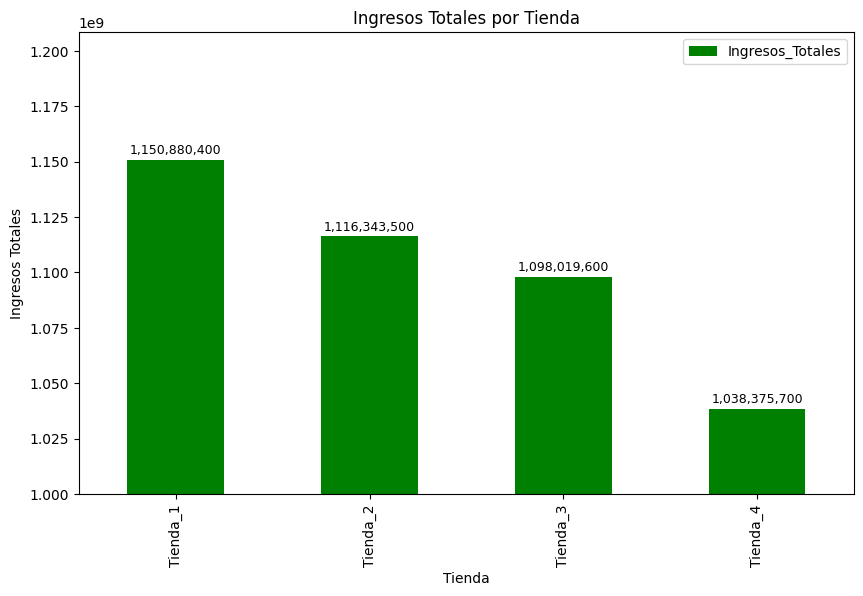

In [ ]:
print(ingreso_total)

gr_ingresos_t = ingreso_total.plot(x= 'Tienda', y= 'Ingresos_Totales', kind='bar', color='green', figsize=(10, 6))
gr_ingresos_t.set_ylim(1000000000, None)
gr_ingresos_t.bar_label(
    gr_ingresos_t.containers[0],
    labels=[f"{x:,.0f}" for x in ingreso_total['Ingresos_Totales']],
    label_type='edge',
    padding=2,
    fontsize=9,
    color='black'
)
gr_ingresos_t.set_title('Ingresos Totales por Tienda')
gr_ingresos_t.set_xlabel('Tienda')
gr_ingresos_t.set_ylabel('Ingresos Totales')

### **2.2 Categorías de productos más y menos vendidas**

Gracias a la información compartida del detalle de ventas, hemos podido identificar las categorias de productos más y menos vendidas. 

En este caso, las 4 tiendas han coincidido con las categorias que se venden en su mayoría y las que no tienen mucha rotación:

- Categorías con mayor ventas: **Muebles, Electrónicos y Juguetes**.  Estas concentran más del **50% de ventas del total** en todas las tiendas.
- Categoría con menor ventas: **Articulos para el hogar**. En las 4 tiendas, esta ha sido la categoría con menor rotación, teniendo poco mas del 7% de ventas en total.

Podemos apoyarnos con los siguientes gráficos:

Text(0, 0.5, 'Categoria del Producto')

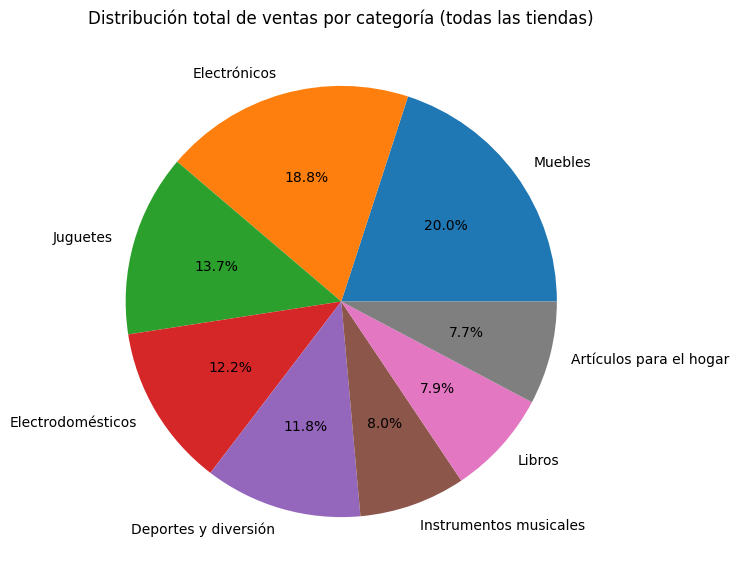

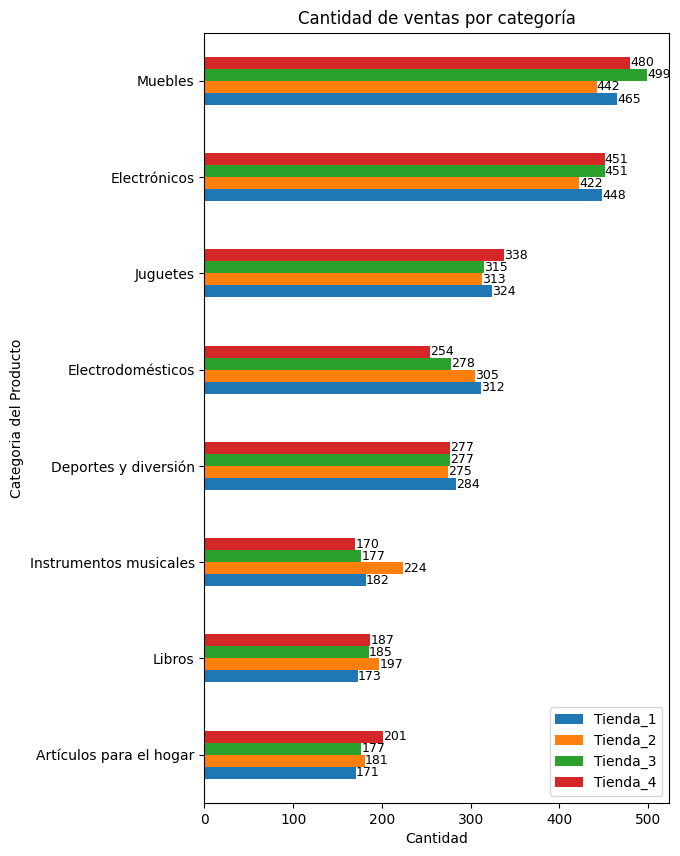

In [180]:
gr_prodxcat_t_c = q_prodxcat_t.sum(axis=1)
gr_prodxcat_t_c = gr_prodxcat_t_c.sort_values(ascending=False)
gr_prodxcat_t_c.plot(kind='pie', 
                    autopct='%1.1f%%', 
                    figsize=(7,7),
                    title='Distribución total de ventas por categoría (todas las tiendas)',
                    ylabel='')

q_prodxcat_t = q_prodxcat_t.loc[q_prodxcat_t.sum(axis=1).sort_values(ascending=True).index]
gr_prodxcat_t_b = q_prodxcat_t.plot(kind='barh', figsize=(6,10))

for container in gr_prodxcat_t_b.containers:
    gr_prodxcat_t_b.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

gr_prodxcat_t_b.set_title('Cantidad de ventas por categoría')
gr_prodxcat_t_b.set_xlabel('Cantidad')
gr_prodxcat_t_b.set_ylabel('Categoria del Producto')

### **2.3 Calificaciones promedio de clientes**

Se ha realizado el análisis en base al promedio total de las calificaciones dejadas por los clientes psoterior a una venta. Estos resultados no muestran necesariamente una diferencia considerable entre cada tienda, ya que la diferenciación la podemos identificar a partir de los decimales, sin emabrgo, podemos concluír que:

- La **Tienda 3** es la tienda con mejor calificación, teniendo en promedio un puntaje de **4.05**.
- La **Tienda 1** es la tienda con peor calificación, teniendo en promedio un puntaje de **3.98**.

Como podemos observar, solo hay una diferencia de 0.07 de puntaje entre la mejor y la peor tienda calificada. Esto se traduce en menos de un 2% de diferencia.

Text(0.5, 0, 'Tiendas')

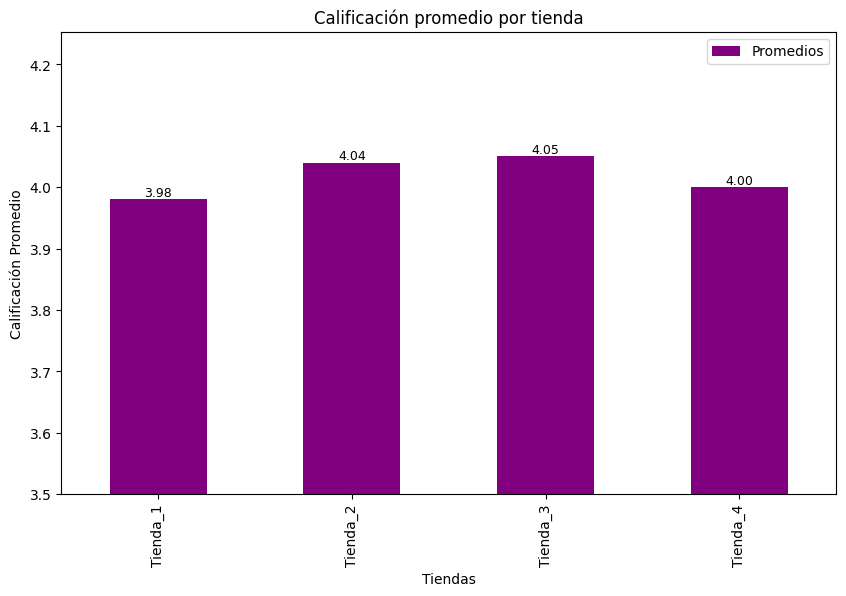

In [181]:
gr_calif_prom_t = calif_prom_t.plot(x='Tiendas', y='Promedios', kind='bar', color='purple', figsize=(10,6), title='Calificación promedio por tienda')
gr_calif_prom_t.set_ylim(3.5, None)
gr_calif_prom_t.bar_label(
    gr_calif_prom_t.containers[0],
    labels=[f"{x:,.2f}" for x in calif_prom_t['Promedios']],
    fmt='%.0f', 
    label_type='edge', 
    fontsize=9, 
    color= 'black'
    )
gr_calif_prom_t.set_ylabel('Calificación Promedio')
gr_calif_prom_t.set_xlabel('Tiendas')


### **2.4 Productos más y menos vendidos**

Existe una gran variedad de productos vendidos por cada tienda, lo cual hace que tenga sentido el poder agruparlos por categoría, sin emabrgo, si queremos determinar en específico los **productos con mayor y menor ventas** por cada tienda, podemos determinar lo siguiente:

En términos generales, se observa que las preferencias de los clientes **varían ligeramente entre tiendas**, aunque ciertos productos destacan de forma recurrente.

- En la **Tienda 1**, los productos más vendidos fueron **Microondas, TV LED UHD 4K y Armario**, mientras que los menos vendidos incluyeron **Ciencia de datos con Python, Pandereta y Olla de presión**.

- En la **Tienda 2**, los artículos más vendidos fueron **Iniciando en programación, Microondas y Batería**, mientras que los de menor venta fueron **Auriculares, Sillón y Mesa de comedor**.

- En la **Tienda 3**, los productos con mayor cantidad de ventas fueron **Kit de bancas, Mesa de comedor y Cama king**, y los menos vendidos fueron **Guitarra eléctrica, Set de vasos y Mochila**.

- En la **Tienda 4**, los más vendidos fueron **Cama box, Cubertería y Dashboards con Power BI**, mientras que los de menor rotación fueron **Refrigerador, Ciencia de datos con Python y Guitarra acústica**.

A continuación, se muestra un listado de los 5 articulos más y menos vendidos por cada tienda.

In [177]:
for tiendas, q in q_prod_dict.items():
    top = q.head(5)
    bottom = q.tail(5)

    print(f"\n{'='*80}")
    print(f"Para la {tiendas}, los 5 productos MÁS vendidos fueron:\n")
    for producto, fila in top.iterrows():
        print(f"  - {producto}: {fila[tiendas]}")
    
    print(f"\nMientras que los 5 productos MENOS vendidos fueron:\n")
    for producto, fila in bottom.iterrows():
        print(f"  - {producto}: {fila[tiendas]}")


Para la Tienda_1, los 5 productos MÁS vendidos fueron:

  - Microondas: 60
  - TV LED UHD 4K: 60
  - Armario: 60
  - Secadora de ropa: 58
  - Mesa de noche: 56

Mientras que los 5 productos MENOS vendidos fueron:

  - Ciencia de datos con Python: 39
  - Pandereta: 36
  - Olla de presión: 35
  - Auriculares con micrófono: 33
  - Celular ABXY: 33

Para la Tienda_2, los 5 productos MÁS vendidos fueron:

  - Iniciando en programación: 65
  - Microondas: 62
  - Batería: 61
  - Guitarra acústica: 58
  - Pandereta: 58

Mientras que los 5 productos MENOS vendidos fueron:

  - Auriculares: 37
  - Sillón: 35
  - Mesa de comedor: 34
  - Impresora: 34
  - Juego de mesa: 32

Para la Tienda_3, los 5 productos MÁS vendidos fueron:

  - Kit de bancas: 57
  - Mesa de comedor: 56
  - Cama king: 56
  - Set de ollas: 55
  - Mesa de noche: 55

Mientras que los 5 productos MENOS vendidos fueron:

  - Guitarra eléctrica: 38
  - Set de vasos: 36
  - Mochila: 36
  - Microondas: 36
  - Bloques de construcción:

### **2.5 Costo de envío promedio**

El costo de envío promedio entre cada tienda es muy similar, de hecho para poder comprenderlo podemos representar esta información como un total de promedios, teniendo así que la tienda con mayor costo de envío es la **Tienda 1**, con un 26.1% de participación en el total de costos de envío con un promedio de **26,018.61**, mientras que la **Tienda 4** tiene una participación del 23.6% **23,459.46** obteniendo una diferencia de costo de poco mas de 2,500.

A continuación el resumen:

    Tiendas  Prom_envíos
0  Tienda_1    26,018.61
1  Tienda_2    25,216.24
2  Tienda_3    24,805.68
3  Tienda_4    23,459.46


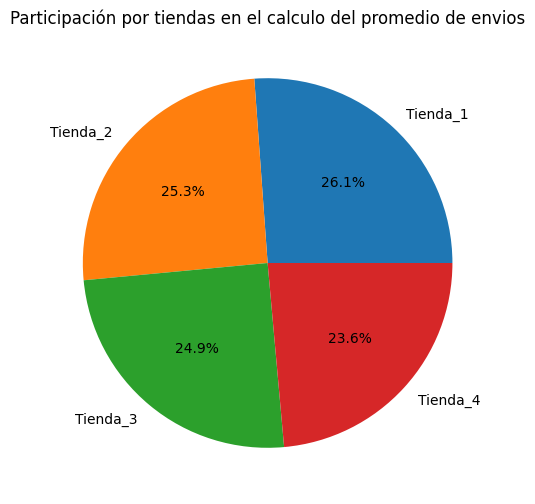

In [182]:
print(envio_prom_t.sort_values('Prom_envíos', ascending=False))
gr_envio_prom_t = envio_prom_t.set_index('Tiendas')['Prom_envíos'].plot(
    kind='pie', 
    autopct='%1.1f%%', 
    title='Participación por tiendas en el calculo del promedio de envios', 
    figsize = (6,6), 
    ylabel=''
    )

## **3. Conclusión del análisis y recomendaciones**

Como hemos podido observar en los puntos de análisis anteriores, los resultados son muy variados y en algunos casos, con diferencias casi imperceptibles, sin embargo, podemos realizar la recomendación de venta de una tienda basándonos en un sistema de puntaje interno (del 1 al 4 por cada factor) según los factores tomados en cuenta. Estos van a estar sujetos al análisis cuantitativo y cualitativo ya descritos en el punto 2, por lo que solo se mostrarán los puntajes, el sentido del puntaje y la suma total:

Mayor puntaje positivo, menor puntaje negativo:

- **Ingresos totales por tienda**

    - **Tienda 1**: 4
    - **Tienda 2**: 3
    - **Tienda 3**: 2
    - **Tienda 4**: 1

- **Categorías de productos más y menos vendidas**

    - **Tienda 1**: 2
    - **Tienda 2**: 1
    - **Tienda 3**: 4
    - **Tienda 4**: 3

- **Calificaciones promedio de clientes**

    - **Tienda 1**: 1
    - **Tienda 2**: 3
    - **Tienda 3**: 4
    - **Tienda 4**: 2

- **Productos más y menos vendidos**

    - **Tienda 1**: 4
    - **Tienda 2**: 1
    - **Tienda 3**: 3
    - **Tienda 4**: 2

- **Costo de envío promedio**

    - **Tienda 1**: 1
    - **Tienda 2**: 2
    - **Tienda 3**: 3
    - **Tienda 4**: 4


De manera cuantitativa podemos determinar que la tienda con mayor desempeño es la **Tienda 3 con un puntaje de 16 sobre 20**, destacando en las calificaciones por parte de los clientes y en la categoría de productos más vendidos ya que su fuerte es la venta de electrónicos y electrodomésticos, los cuales dejan un margen de ingreso mayor con menores existencias (debido al precio unitario por encima de las otras categorias). Seguido por la **Tienda 1 y la Tienda 4 con un puntaje de 12 sobre 20 para ambas**, tieniendo un buen desempeeño en la cantidad de ingresos totales y costo de envíos promedios respectivamente. Los ingresos totales se representan como mayor cantidad de ventas y utilidades, mientras que un costo de envío promedio menor hace que el precio final de los productos tambien sea menor, beneficiando así al cliente quién es el que paga el envío. Por último, la tienda con menor desempeño de las 4 fue la **Tienda 2 con un puntaje de 10 sobre 20**. Esta tienda no sobresalió en ninguna de las categorías pero si tuvo un desempeño aceptable en cuanto a ventas y calificación de los clientes, sin embargo, las ventas realizadas se dan en categorías en las que los precios unitarios no son tan altos, por lo que para poder llegar a un objetivo de ventas, se debe necesitar una gestión y costos de almacenamiento mayores, los cuales a la larga pueden significar menor rendimiento macro en administración de existencias.

**Recomendación**

Los resultados han arrojado números muy similares y cercanos en todos los factores analizados, por lo que es dificil cerrar con una respuesta contundente, sin embargo, si nos centramos en las diferencias minúsculas entre los desempeños de cada tienda, **se le recomineda al Sr. Juan optar por el cierre de la Tienda 2**.







